# Exercise 01.1

## Computing expected values of $1^{st}$ moment and $2^{nd}$ central moment

The following code computes a numerical estimation of the expected values $\langle r \rangle$ and $\sigma^2=\langle (r - \langle r \rangle )^2\rangle $, where r is extracted from a uniform distribution between 0 and 1. 
Then: 
$$ \langle r \rangle = \int_0^1 r dr = 1/2 $$
and
$$ \sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 $$
The estimates are computed with $M$ pseudo-randomly generated numbers (referred to as throws), divided in $N$ blocks.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

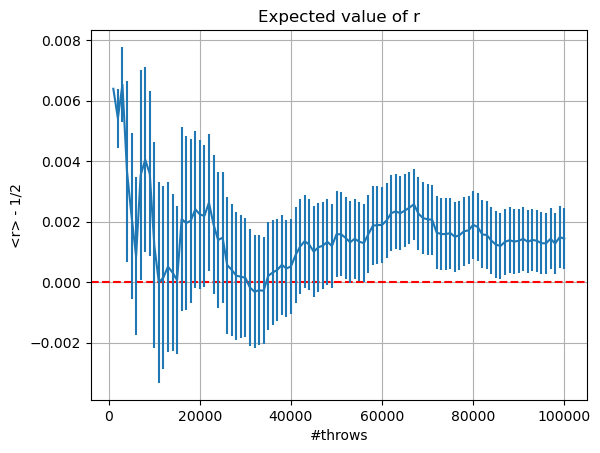

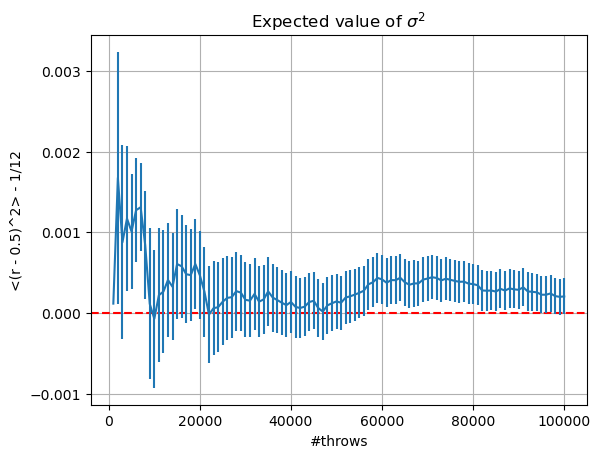

In [2]:
# Loading data from file "parameters.dat" into arrays M and N
M, N = np.loadtxt("es01.1/parameters.dat", delimiter=' ', usecols=(0,1))

# Calculating the length of each block
L = int(M/N)

# Creating an array 'x' containing numbers from 1 to N, then multiplying each element by L
x = np.arange(N)+1
x *= L  # Number of throws = block * (Number of throws in each block)

# Load data for average and its error from a file named "average.out" into arrays av_prog and err_prog
av_prog, err_prog = np.loadtxt("es01.1/average.out", usecols=(0,1), delimiter=' ', unpack='true')

# Plotting the data points with error bars
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.errorbar(x, av_prog - 0.5, yerr=err_prog)  # Plotting the data points with errors
plt.xlabel('#throws')  # Labeling x-axis
plt.ylabel('<r> - 1/2')  # Labeling y-axis
plt.title('Expected value of r')  # Adding a title to the plot
plt.grid(True)  # Adding grid lines to the plot
plt.show()  # Displaying the plot

# Load data for variance and its error from a file named "variance.out" into arrays sigma2_prog and errsigma_prog
sigma2_prog, errsigma_prog = np.loadtxt("es01.1/variance.out", usecols=(0,1), delimiter=' ', unpack='true')

# Plotting the data points with error bars
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.errorbar(x, sigma2_prog - 1./12., yerr=errsigma_prog)  # Plotting the data points with errors
plt.xlabel('#throws')  # Labeling x-axis
plt.ylabel('<(r - 0.5)^2> - 1/12')  # Labeling y-axis
plt.title('Expected value of $\sigma^2$')  # Adding a title to the plot
plt.grid(True)  # Adding grid lines to the plot
plt.show()  # Displaying the plot


## Evaluation of $\chi^2$
The two following cells of code display the comparison between an histogram of $\chi^2$ variables with 100 degrees of freedom with the corresponding theoretical distribution. The variable is defined as:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
where $M=10^2$ is the number of sub-intervals the $[0,1]$ interval is divided into and $n=10^4$ is the number of uniformly distributed random variables extracted to compute each value of $\chi^2$. $100$ independent values of $\chi^2$ are computed, for a total of $10^6$ random values extracted.
The theoretical distribution for the $\chi^2$ is given by:
$$p(\chi^2) = \frac{1}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}x^{\frac{\nu}{2}-1}e^{-\frac{x}{2}} $$
where $\nu=100$ is the number of degrees of freedom.

In [3]:
import scipy.special as spec

def chi_pdf(x, dof: int):
    """
    Probability density function of chi^2 distribution.

    Parameters:
    - x: Input value(s) at which to evaluate the PDF.
    - dof: Degrees of freedom of the chi^2 distribution.

    Returns:
    - PDF value(s) corresponding to the input x.
    """
    # Calculate the normalization factor for the PDF
    norm = pow(2, dof/2) * spec.gamma(dof/2)
    # Calculate the PDF function
    func = pow(x, dof/2 - 1) * np.exp(-x/2)
    # Normalize the PDF by the normalization factor
    pdf = func / norm
    return pdf

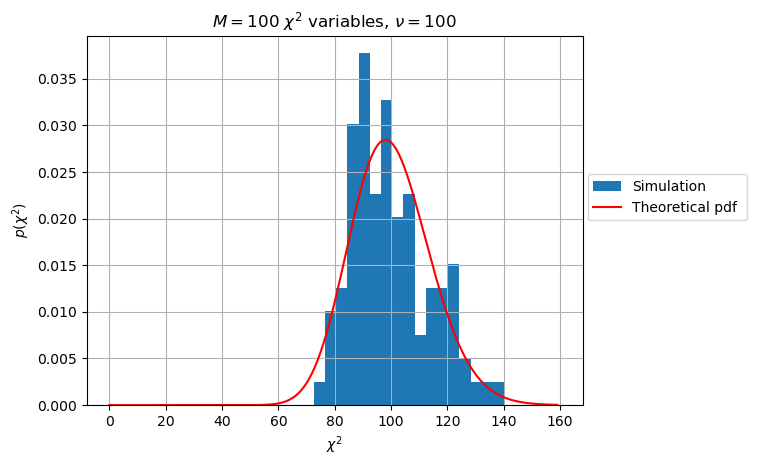

In [4]:
# Creation of figure and axis
fig, ax = plt.subplots(1, 1)

# Load data from file
data = np.loadtxt("es01.1/chi.out", usecols=0, delimiter=' ')

# Define number of bins for the histogram
n_bins = 40

# Plot histogram of data
ax.hist(data, n_bins, density=True, range=(1, 160), label='Simulation')

# Generate x-values for theoretical PDF
x = np.linspace(0, 160, num=160, endpoint=False)

# Compute theoretical PDF values using chi_pdf function
pdf = chi_pdf(x, dof=100)

# Plot theoretical PDF
ax.plot(x, pdf, color="red", label="Theoretical pdf ")

# Set labels and title for the plot
ax.set_xlabel('$\chi^2$')
ax.set_ylabel('$p (\chi^2)$')
ax.set_title(f'$M={data.shape[0]}$ $\chi^2$ variables, '+r'$\nu=100$')

# Add grid lines to the plot
ax.grid(True)

# Add legend to the plot
ax.legend(loc=(1.01, 0.5))


# Exercise 01.2
This exercise verifies numerically the central limit theorem by comparing the behaviour of the variable $S_N = \frac{1}{N}\sum_{i=1}^N x_i$, where $x_i$ are drawn from a uniform ($1^{st}$ figure), exponential ($2^{nd}$ figure) and a lorentzian ($3^{rd}$ figure) distribution. A fit is also performed with the $S_N$ distribution for $N=100$.  
We observe that the distribution of the $S_N$ for distributions with finite variance (uniform and exponential) is nicely fitted by a gaussian for large $N$, while the lorentzian distribution remains the same independently of the value of $N$, since the Lorentz function is a fixed point of the convolution operator.  
As a matter of fact, the distribution of the sum $X$ of $2$ (easily generalized to $N$ variables) independent random variables $X_1$ and $X_2$ with distributions $p_{X_1}(x_1)$ and $p_{X_2}(x_2)$ is given by the *convolution* of such distributions:

$$p_X(x) = (p_{X_1} \ast p_{X_2})(x) = \int_{-\infty}^\infty dt p_{X_1}(t) p_{X_2}(x-t)$$

and the normalized Lorentz function convoluted with itself (our case since $x_i$ are identically distributed) gives itself.

In [3]:
from scipy.optimize import curve_fit

# Define the Gaussian fitting function
def gauss(x, mu, sigma):
    # Calculate the normalization factor for the Gaussian function
    normalization = np.sqrt(2 * np.pi) * sigma
    
    # Calculate the Gaussian function
    func = np.exp(-0.5 * ((x - mu) / sigma)**2)
    
    # Normalize the Gaussian function by the normalization factor
    gaussian = func / normalization
    
    return gaussian

# Define the Lorentzian fitting function
def lorentz(x, mu, gamma):
    # Calculate the normalization factor for the Lorentzian function
    normalization = np.pi / gamma
    
    # Calculate the Lorentzian function
    func = 1 / ((x - mu)**2 + gamma**2)
    
    # Normalize the Lorentzian function by the normalization factor
    lorentzian = func / normalization
    
    return lorentzian


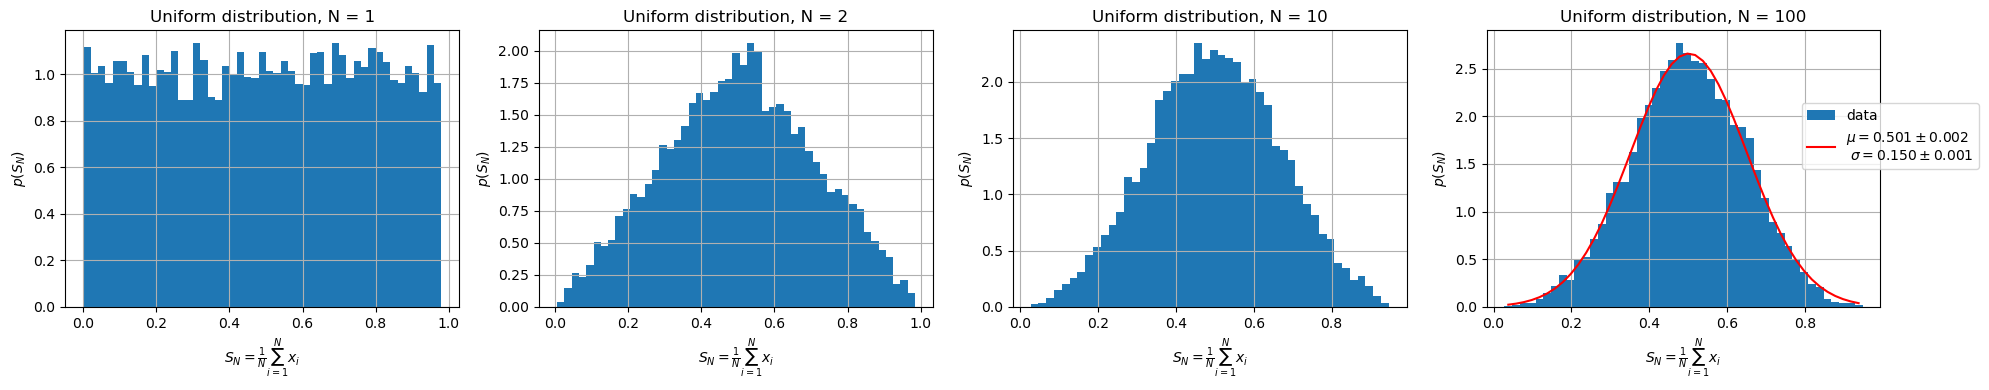

In [7]:
# Download parameters from simulation
params = np.loadtxt("es01.2/parameters.dat", usecols=0, delimiter=' ')

# Creation of figure for uniform distribution
fig, axx = plt.subplots(1, 4, figsize=(20, 4), tight_layout=True)
axx.reshape(-1)
i = 0
for parameter in params:
    ax = axx[i]
    i += 1
    
    # Load data from file
    data = np.loadtxt("es01.2/unif" + str(int(parameter)) + ".out", usecols=0, delimiter=' ')
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Plot data
    ax.hist(data, bins=np.arange(min_val, max_val, step=0.02), density=True, range=(min_val, max_val), label="data")
    
    # Axes parameters
    ax.set_xlabel(r'$S_N = \frac{1}{N}\sum_{i=1}^N x_i$')
    ax.set_ylabel(f'$p (S_N)$')
    ax.set_title(f'Uniform distribution, N = {int(parameter)}')
    ax.grid(True)
    
    # Fit (only for the last curve)
    if i == len(params):
        y, x = np.histogram(data, bins=np.arange(min_val, max_val, step=0.02), density=True)
        x = x[:-1]
        x += 0.01
        
        # Perform Gaussian fit using curve_fit
        p_opt, p_cov = curve_fit(gauss, x, y)
        gauss_fit = gauss(x, p_opt[0], p_opt[1])
        
        # Plot Gaussian fit
        ax.plot(x, gauss(x, p_opt[0], p_opt[1]), color="Red", label=f"$\mu = {format(p_opt[0], '.3f')} \pm {format(np.sqrt(p_cov[0][0]), '.3f')}$ \n $\sigma = {format(p_opt[1], '.3f')} \pm {format(np.sqrt(p_cov[1][1]), '.3f')}$")
        ax.legend(loc=(0.8, 0.5))


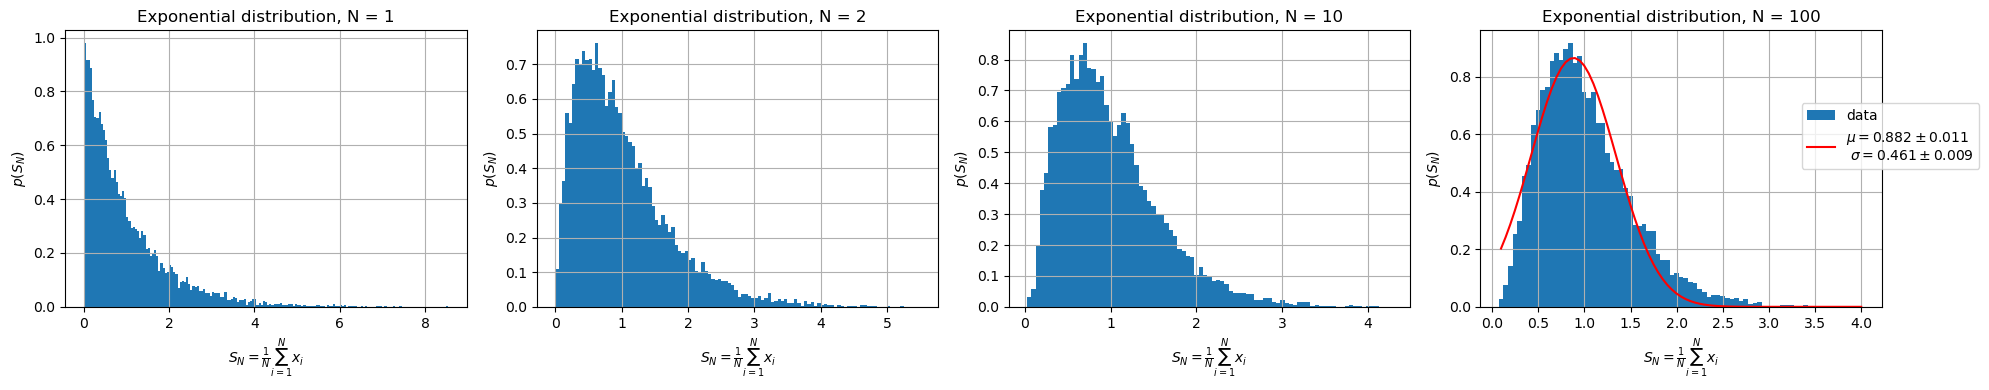

In [8]:
# Creation of figure for exponential distribution
fig, axx = plt.subplots(1, 4, figsize=(20, 4), tight_layout=True)
axx.reshape(-1)
i = 0
for parameter in params:
    ax = axx[i]
    i += 1
    
    # Load data from file
    data = np.loadtxt("es01.2/exp" + str(int(parameter)) + ".out", usecols=0, delimiter=' ')
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Plot data
    ax.hist(data, bins=np.arange(min_val, max_val, step=0.05), density=True, range=(min_val, max_val), label='data')
    
    # Axes parameters
    ax.set_xlabel(r'$S_N = \frac{1}{N}\sum_{i=1}^N x_i$')
    ax.set_ylabel(f'$p (S_N)$')
    ax.set_title(f'Exponential distribution, N = {int(parameter)}')
    ax.grid(True)
    
    # Fit (only for last curve)
    if i == len(params):
        y, x = np.histogram(data, bins=np.arange(min_val, max_val, step=0.05), density=True)
        x = x[:-1]
        x += 0.025
        
        # Perform Gaussian fit using curve_fit
        p_opt, p_cov = curve_fit(gauss, x, y)
        gauss_fit = gauss(x, p_opt[0], p_opt[1])
        
        # Plot Gaussian fit
        ax.plot(x, gauss(x, p_opt[0], p_opt[1]), color="Red", label=f"$\mu = {format(p_opt[0], '.3f')} \pm {format(np.sqrt(p_cov[0][0]), '.3f')}$ \n $\sigma = {format(p_opt[1], '.3f')} \pm {format(np.sqrt(p_cov[1][1]), '.3f')}$")
        ax.legend(loc=(0.8, 0.5))


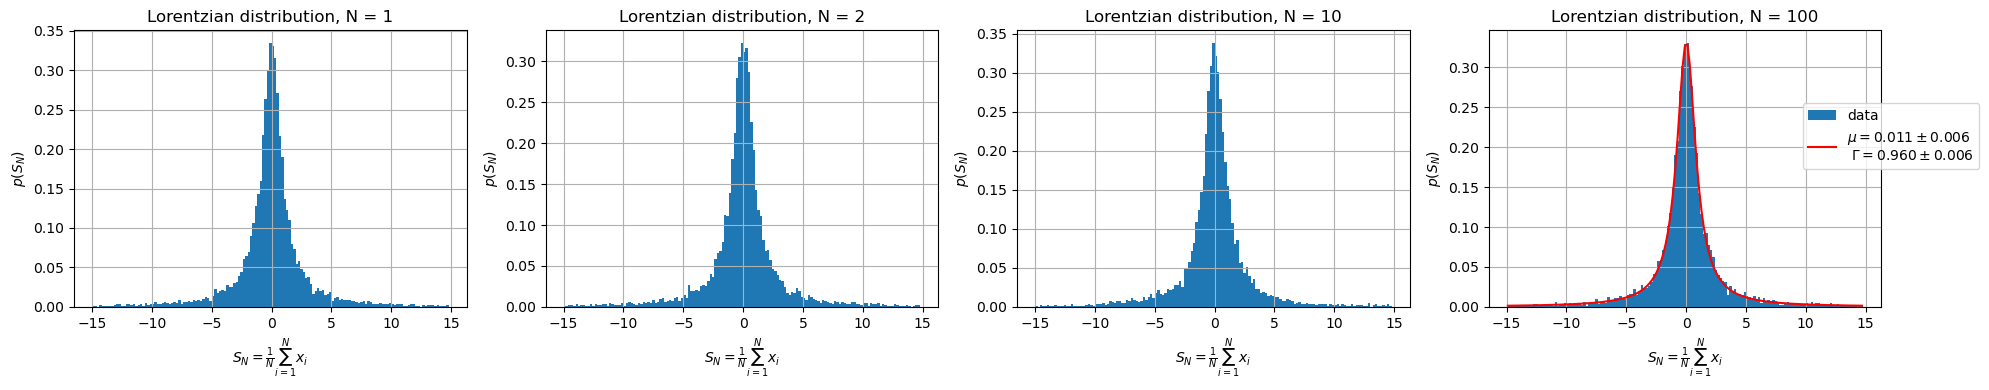

In [9]:
# Creation of figure for Lorentzian distribution
fig, axx = plt.subplots(1, 4, figsize=(20, 4), tight_layout=True)
axx.reshape(-1)
i = 0
for parameter in params:
    ax = axx[i]
    i += 1
    
    # Load data from file
    data = np.loadtxt("es01.2/lorentz" + str(int(parameter)) + ".out", usecols=0, delimiter=' ')
    min_val = -15
    max_val = 15
    
    # Plot data
    ax.hist(data, bins=np.arange(min_val, max_val, step=0.2), density=True, range=(min_val, max_val), label='data')
    
    # Axes parameters
    ax.set_xlabel(r'$S_N = \frac{1}{N}\sum_{i=1}^N x_i$')
    ax.set_ylabel(f'$p (S_N)$')
    ax.set_title(f'Lorentzian distribution, N = {int(parameter)}')
    ax.grid(True)
    
    # Fit (only for last curve)
    if i == len(params):
        y, x = np.histogram(data, bins=np.arange(min_val, max_val, step=0.2), density=True)
        x = x[:-1]
        x += 0.1
        
        # Perform Lorentzian fit using curve_fit
        p_opt, p_cov = curve_fit(lorentz, x, y) 
        lorentz_fit = lorentz(x, p_opt[0], p_opt[1])
        
        # Plot Lorentzian fit
        ax.plot(x, lorentz(x, p_opt[0], p_opt[1]), color="Red", label=f"$\mu = {format(p_opt[0], '.3f')} \pm {format(np.sqrt(p_cov[0][0]), '.3f')}$ \n $\Gamma = {format(p_opt[1], '.3f')} \pm {format(np.sqrt(p_cov[1][1]), '.3f')}$")
        ax.legend(loc=(0.8, 0.5))


# Exercise 01.3
Here we simulate Buffon's experiment in order to estimate the mathematical constant $\pi$. A needle with length $L$ is thrown randomly on a plane divided in vertical stripes with width $d$. Because of the discrete symmetry of horizontal traslation by an amount $d$ and the traslational vertical symmetry, the y coordinate of the needle's midpoint is irrelevant and the problem can be simulated just on the interval $[0, d]$.
My strategy for simulating the experiment consists in these steps:  
1. Draw a variable $x_m$ uniformly from the interval $[0, d]$. This is the needle's midpoint's $x$ coordinate.
2. Draw two points uniformly in the $[0,1]\times[0,1]$ square, then take the incremental ratio $m=\frac{y_2-y_1}{x_2-x_1}$. This is the slope of the of the needle (no previous knowledge of $\pi$ needed!).
4. Compute the $x$ coordinates of the left and right endpoints of the needle: $$x_{left} = x_m - \frac{L}{2\sqrt{1+m^2}}$$ $$x_{right} = x_m + \frac{L}{2\sqrt{1+m^2}}$$
5. Check if $x_{left} < 0$ *or* $ x_{right} > d$: if yes, increase the hit counter $n_{hits}$.
6. Repeat.

This process is repeated $n=\frac{M}{N}$ times for each block, where M is the number of total throws and N the number of blocks. For every block, the given estimation of $\pi$ is: $$ \Pi = \frac{2L}{d}\frac{n}{n_{hits}}$$

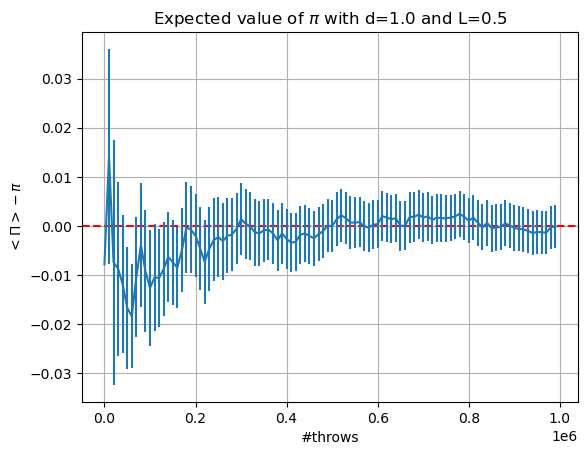

In [11]:
# Load parameters from file
d, length, M, N = np.loadtxt("es01.3/parameters.dat", delimiter=' ', usecols=(0, 1, 2, 3))
L = int(M/N)  # Calculate the length of each block
x = np.arange(N)
x *= L  # Number of throws = block * (Number of throws in each block)

# Load data from file
av_prog, err_prog = np.loadtxt("es01.3/pi_estim.out", usecols=(0,1), delimiter=' ', unpack='true')

# Plot the data with error bars
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.errorbar(x, av_prog - math.pi, yerr=err_prog)  # Plotting the data points with errors
plt.xlabel('#throws')  # Labeling x-axis
plt.ylabel(r'$<\Pi>-\pi$')  # Labeling y-axis
plt.title(f'Expected value of $\pi$ with d={d} and L={length}')  # Adding a title to the plot
plt.grid(True)  # Adding grid lines to the plot
plt.show()  # Displaying the plot

# Extra
In order to check empirically if the method used in exercise 01.3 to compute $m$ is valid, we generated $n$ values of $m$ with said method and check if they follow a Lorentzian distribution (since our goal is to draw $\theta$ uniformly, and $m=tan\theta$, then $m$ must be drawn with a lorentzian distribution). In particular, it can be shown that: $$ p(m)= \frac{1}{\pi}\frac{1}{1+m^2}$$ We do a fit with a Lorentz distribution and calculate the $\chi^2=\sum_{i=1}^{N}\frac{(O_i-E_i)^2}{E_i}$.

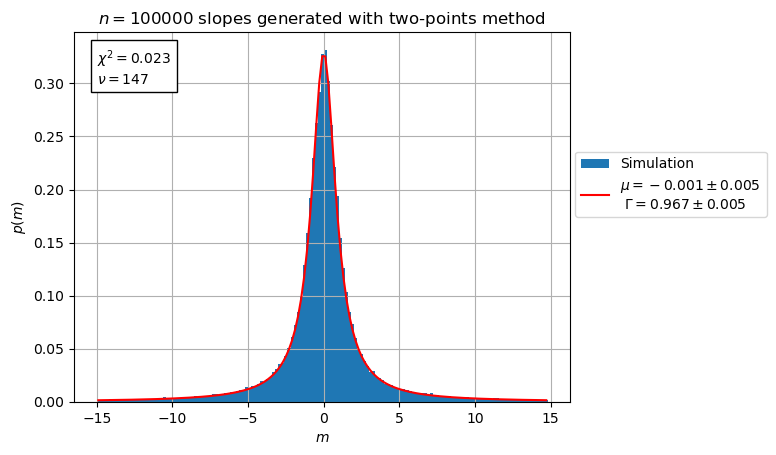

In [4]:
# Creation of figure
fig, ax = plt.subplots(1, 1)

# Load data from file
data = np.loadtxt("es01.3/test.out", usecols=0, delimiter=' ')
min_val = -15
max_val = 15

# Plot histogram of data
ax.hist(data, bins=np.arange(min_val, max_val, step=0.2), density=True, range=(min_val, max_val), label='Simulation')

# Axes parameters
ax.set_xlabel('$m$')
ax.set_ylabel('$p (m)$')
ax.set_title(f'$n = {data.shape[0]}$ slopes generated with two-points method')
ax.grid(True)

# Perform Lorentzian fit using curve_fit
y, x = np.histogram(data, bins=np.arange(min_val, max_val, step=0.2), density=True)
x = x[:-1]
x += 0.1
p_opt, p_cov = curve_fit(lorentz, x, y) 
lorentz_fit = lorentz(x, p_opt[0], p_opt[1])

# Plot Lorentzian fit
ax.plot(x, lorentz(x, p_opt[0], p_opt[1]), color="Red", 
        label=f"$\mu={format(p_opt[0], '.3f')}\pm {format(np.sqrt(p_cov[0][0]), '.3f')}$ \n $\Gamma={format(p_opt[1], '.3f')}\pm {format(np.sqrt(p_cov[1][1]), '.3f')}$")

# Compute chi2 with fitting function
observed = y
squared_distances = (observed - lorentz(x, p_opt[0], p_opt[1]))**2 / (lorentz(x, p_opt[0], p_opt[1]))
chi2 = np.sum(squared_distances)

# Display χ² value and degrees of freedom
ax.text(-15, 0.3, 
        r"$\chi^2$"+f"$={format(chi2, '.3f')}$ \n"+r"$\nu=$"+f"${squared_distances.shape[0]-2}$ ", 
        bbox=dict(facecolor='white', alpha=1))

# Add legend to the plot
ax.legend(loc=(1.01, 0.5))

The extremely low value of the $\chi^2$ variable makes us confident that this is a suitable method for sampling a uniformly distributed random angle between $0$ and $2\pi$.